# Homework #4 Part I: Fit this model using HMC in `PyMC`

For the model specification example considered in "Metropolis within Gibbs" above...


## Provide posterior analysis for this model using "default" `PyMC` 

- Don't try to do "Metropolis within Gibbs" `in PyMC` -- you can't -- use the default HMC sampler
- You can do this without knowing what HMC is: you've already previously used HMC with `PyMC`; and, you can go get the distributions you need [here...](https://www.pymc.io/projects/docs/en/stable/api/distributions.html)
- ***Explore and describe the sample sizes needed to support inference regarding the `df` parameter $(\nu)$***

*Ahem...*

- Is it eating you up inside that you don't know what HMC actualy is? 
- Do you hate just using something without knowing what it is?<br>Or what you're even doing when you use it? 

*Well then, my friends, have I got the cure for you!*<br>All **you** must **do** is listen **to** someone **who** will re**view** for **you** the next slides **few**!



In [8]:
from scipy import stats; import numpy as np; import matplotlib.pyplot as plt ; import pymc as pm; import arviz as az



Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


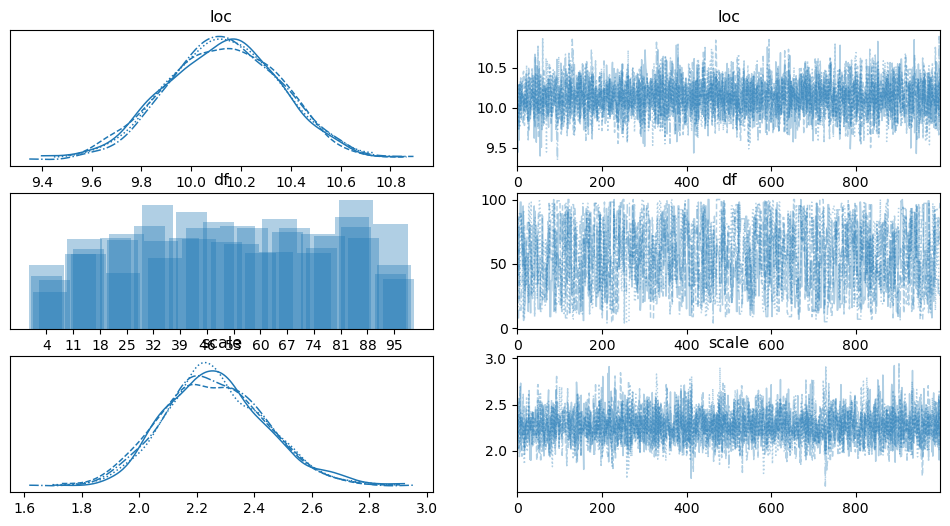

In [9]:
#Lecture x
n,loc_true,scale_true,df_true = 100,10,2,15 # True values data will be from... IRL, we don't know these values
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n) # Data from location-scale-t distribution 


with pm.Model() as t_norm_half_discrete:
    loc = pm.Normal("loc", mu=0, sigma=10)
    scale = pm.HalfNormal("scale", sigma=5)
    df = pm.DiscreteUniform("df", lower=1, upper=100)
    x_obs = pm.StudentT("likelihood", mu = loc, sigma = scale, nu = df, observed = x)

with t_norm_half_discrete:
    idata_HMC = pm.sample()
    
az.plot_trace(idata_HMC);

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


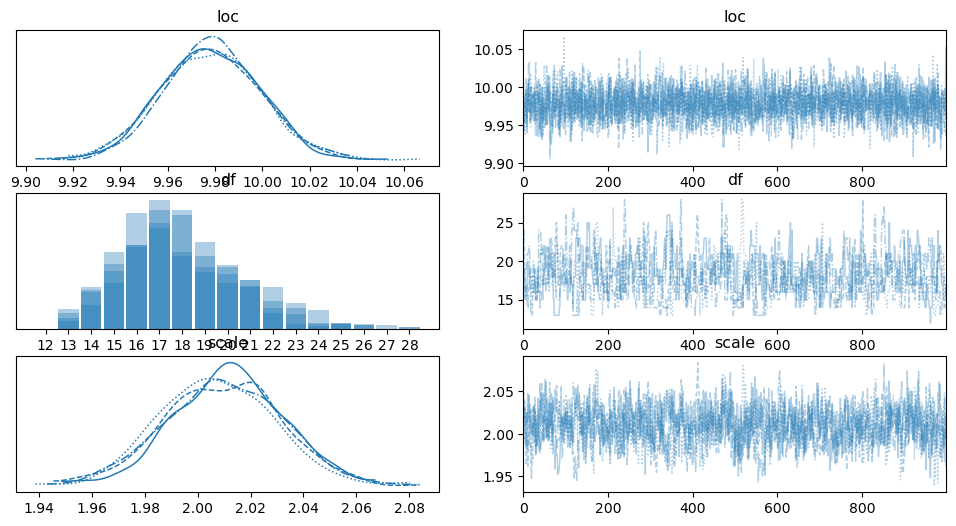

In [12]:
#Lecture x
n,loc_true,scale_true,df_true = 10000,10,2,15 # True values data will be from... IRL, we don't know these values
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n) # Data from location-scale-t distribution 


with pm.Model() as t_norm_half_discrete:
    loc = pm.Normal("loc", mu=0, sigma=10)
    scale = pm.HalfNormal("scale", sigma=5)
    df = pm.DiscreteUniform("df", lower=1, upper=100)
    x_obs = pm.StudentT("likelihood", mu = loc, sigma = scale, nu = df, observed = x)

with t_norm_half_discrete:
    idata_HMC = pm.sample()
    
az.plot_trace(idata_HMC);

# I believe from the trace plots, sample size must be large  nees to be large to support inference regarding df.

# Homework #4 Part II: HMC Diagnostics 

- Return to your posterior analysis in "Homework #4 Part I" and 
report on (a) ***effective sample sizes***; (b) ***chain convergence measures***; (c) ***divergences***; (d) ***Metropolis-Hastings acceptance rates*** [see below for how to access these]; and (e) any other warnings or concers provided by `PyMC` 

- Now examine the [Eight Schools](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week3/STA410_W24_Week3_Demo_HMCwithPyMC.ipynb) example PyMC model and outputted results
    - Provide an analogous report regarding (a)-(e) above for the "centered" and "uncentered" Eight Schools models
        - *Hint: for (d) see `fit_C.sample_stats.acceptance_rate.values.flatten()` and `fit_NC.sample_stats.acceptance_rate.values.flatten()` and in the Eight Schools example* 
    - From the perspective of ***curvature*** of the ***energy function*** (that is, how rapidly the ***log joint posterior distribution density*** changes for different values of its ***random variable (parameters)*** and the effectiveness of the ***HMC*** algorithm, explain why the "uncentered" paramterization of the model performs better than the "centered" parameterization
        - *Hint: see the previous two slides...*
- Review [this](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#model-checking) and [that](https://discourse.pymc.io/t/about-nuts-sampling-and-energy-plot/831) discussing the ***diagnostic plot*** which compares the ***observed energy proposal distribution*** versus the ***empirical energy distribution*** of the generated HMC samples
    - Use the code on the next slide to provide and interpret the ***diagnostic plot*** assessing ***energy proposals*** versus the empirical ***energy*** distribution to compare and contrast the "centered" and "uncentered" Eight Schools models in relation to you previous comparision of these two model parameterization in terms of ***energy function curvature*** and the effectiveness of the ***HMC*** algorithm... does this diagnostic support your previous conclusions in these regards?




In [14]:
az.summary(idata_HMC, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc,9.98,0.02,9.94,10.01,0.00,0.00,2974.85,2561.77,1.00
df,17.94,2.66,13.00,22.00,0.13,0.09,385.29,523.31,1.01
scale,2.01,0.02,1.97,2.05,0.00,0.00,597.89,943.27,1.01


a) we can see the effective sample size for loc is and scale are relatively high but for df it is low.


b) We can see that the r_hat are all below 1.05 which suggests that the MC is convergent to it stationary distribution 

In [21]:
SEED = [20100420, 20134234]
with t_norm_half_discrete:
    fit_t = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


c) we ca see that there are 0 divergences using the method from the STA410 W3 code

In [27]:
fit_t.sample_stats.acceptance_rate.values.flatten()

array([0.90116795, 1.        , 1.        , ..., 0.79070048, 0.7937531 ,
       0.96219773])

d) We can see that the Metropolis-Hastings acceptance rates are all very high and generally above 0.79. This also supports the fact that we have low/no divergences.

In [16]:
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])


with pm.Model() as Centered_eight:

    # We assume the following prior distributions for our parameters
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)

    # and we assume the following probabilistic hierarchy
    # within the data generating mechanism
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J) # theta is length J=8

    # Note that if tau was small, then the density evalution above
    # could change rapidly for changes in theta
    # This means that the energy has high curvature

    # likelihood where observed information enters into the model
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)
     

In [20]:
SEED = [20100420, 20134234]
with t_norm_half_discrete:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [22]:
with pm.Model() as NonCentered_eight:

    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
    # Changes in theta now take place on a fixed scale that is independent of tau

    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    # Changes in tau can still result in rapid changes in the density evaluations
    # below so the energy still has high curvature with respect to tau; but,
    # it no longer has high curvature with respect to theta
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

In [23]:
with NonCentered_eight:
    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                       return_inferencedata=True, idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta_t]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 5 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [24]:
fit_C.sample_stats.acceptance_rate.values.flatten()

array([0.9339    , 0.650432  , 0.92738656, ..., 0.90158151, 0.21343995,
       0.20100958])

In [25]:
fit_NC.sample_stats.acceptance_rate.values.flatten()

array([0.96584575, 0.96401304, 0.95955225, ..., 0.91078674, 0.86984342,
       0.94029322])

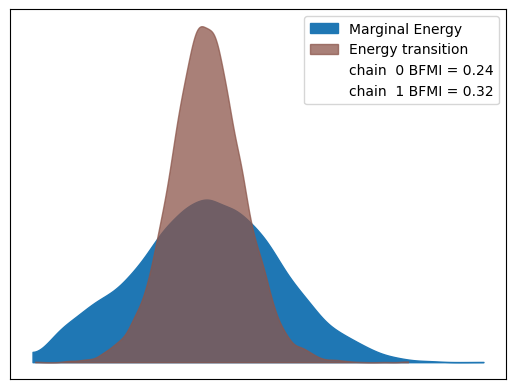

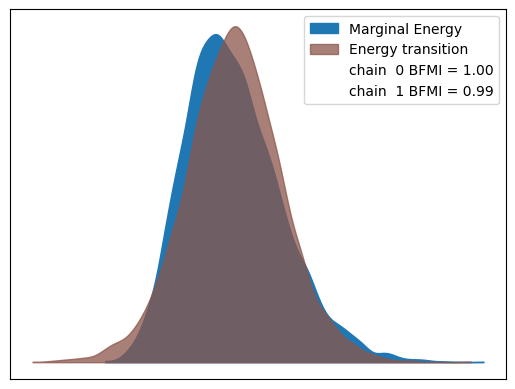

In [26]:
az.plot_energy(fit_C);
az.plot_energy(fit_NC);

I believe this supports my prior reports regarding the analysis of the model.